# Lab 5

## Repositoryt:
Att få tillgång till själva uppgiften kräver några steg (det blir enklare vid nästa laboration).

### Steg 1:
Du behöver bestämma dig för om du vill arbeta ensam eller tillsammans med annan student (max 2 personer).

### Steg 2:
Du kommer behöva ett eget konto på https://github.com/. om du redan har ett så går det att använda eller så skapar du ett nytt. Säkerställ att du har verifierat ditt konto innan du går vidare.

### Steg 3:
En i paret (eller du om du arbetar enskilt) besöker följande länk: https://classroom.github.com/a/6bLXhWmBLinks to an external site.  där du har möjlighet att:
- Gå med i GitHub "klassrummet" som vi nyttjar för kursen (uu-da VT2024).
- Länka samman ditt GitHub konto med ditt studentnamn (du bör kunna hitta ditt namn i en lista, om inte så klicka dig vidare).
- Skapa ett "team" detta är så du kan arbeta i par om du vill (du kan behöva skapa ett team även om du arbetar enskilt SKAPA BARA ETT TEAM om ni arbetar tillsammans).

### Steg 4:
Du bör nu har fått en egen kopia (fork) av uppgiften till ditt repository. Din lagmedlem kan nu besöka samma adress men istället för att skapa ett nytt team gå med i det som skapades i föregående steg.

 

## DATAKÄLLAN:

Länk till datakällan som nyttjas: https://www.kaggle.com/pavansubhasht/ibm-hr-Links to an external site.analytics-attrition-datasetLinks to an external site.

Via länken på Kaggle finns, förutom det dataset ni ska använda också en del inspiration kring deskriptiv analys, några förslag (och implementation) av prediktiv analys, beskrivning av kolumner etc. Det är fritt fram att använda kod som ni hittar på internet och även på Kaggle. Det är dock inte tillåtet att kopiera en hel lösning rakt av. Det är också ett krav att ni själva förklarar och motiverar den kodning ni redovisar.

## Att göra

Utgångspunkten i slutuppgift 1 (och 2) är att ni arbetar som data science konsulter och ni har fått ett uppdrag för ett företag som berör deras personalavdelning. Företaget har samlat in data om sina anställda och vill att ni ska använda detta data för att hjälpa dem att bli bättre på att behålla sina anställda. Er uppgift är därmed att använda den data ni fått till att att hjälpa dem att bli bättre på att behålla sina anställda. Detta skall uppnås genom att applicera deskriptiv samt prediktiv analys på datakällan.

### Flödet för uppgiften är således

- Förstå vilket problem som kan lösas med det data ni har ta fram en lämplig frågeställning/problemformulering som kan lösas med hjälp av den data ni har

- Definiera mål med analysen.
- Identifiera nödvändig data.
- Förbereda data så att det går att analysera (data wrangling)
- Identifiera potentiella metoder och välja bland dessa.
- Kalibrera parametrar för varje metod.
- Analysera och utvärdera era resultat

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import hvplot.pandas
from scipy.stats import chi2_contingency


In [41]:
df = pd.read_csv('data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

df.shape

(1470, 35)

## Lär känna din data

Ni måste visa att ni genomfört lämpliga operationer för att lära känna ert dataset. Ex.

### 1.Beräkna statistik:
- Percentiler är användbart för att hitta vilken range ett dataset har.
- Medel och median kan beskriva centrala tendenser i data.
- Korrelation kan indikera starka relationer vilket är användbart för att identifiera lämpliga features.

### 2. Visualisera din data
- Box plots kan identifiera outliers.
- Densitetsplottar och histogram kan visa spridningen.
- Spridningsdiagram kan beskriva bivarata relationer.
Tvätta och förstärk din data och - ni måste visa att du genomfört lämpliga operationer för att göra er data redo för analys, det kan handla exempelvis om:
 
### Hantera saknade värden
- Saknade värden påverkar vissa modeller mer än andra (ANN fungerar inte alls med saknade värden). Även modeller som kan hantera saknade värden kan påverkas av dem, exempelvis genom att prediktioner blir sämre.

### Hantera outliers
- Vissa modeller är mindre känsliga för outliers än andra (trädstrukturer är vanligtvis mindre känsliga medan exempelvis linjär regression är mycket känsliga
- Kom ihåg att outliers kan bero på att kvaliteten på data är dålig, men det kan också vara extrema värden som är korrekta

Fundera på om du behöver aggregera data innan det är användbart?
Vilka andra förändringar behöver du göra? (formatera, minska dimensioner, redundant data, dummy-variabler etc.) och av vilken anledning?


In [3]:
df.head

<bound method NDFrame.head of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationFi

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Tabellen beskriver unika värden som finns inom datasetet.

In [6]:
for column in df.columns:
    print(f"{column}: Unika värden {df[column].nunique()}")
    print("----------------------------------------------")

Age: Unika värden 43
----------------------------------------------
Attrition: Unika värden 2
----------------------------------------------
BusinessTravel: Unika värden 3
----------------------------------------------
DailyRate: Unika värden 886
----------------------------------------------
Department: Unika värden 3
----------------------------------------------
DistanceFromHome: Unika värden 29
----------------------------------------------
Education: Unika värden 5
----------------------------------------------
EducationField: Unika värden 6
----------------------------------------------
EmployeeCount: Unika värden 1
----------------------------------------------
EmployeeNumber: Unika värden 1470
----------------------------------------------
EnvironmentSatisfaction: Unika värden 4
----------------------------------------------
Gender: Unika värden 2
----------------------------------------------
HourlyRate: Unika värden 71
----------------------------------------------
JobInvolve

Tabellen beskriver max och minimi värden på olika kolumner som finns inom datasetet

In [7]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
EmployeeNumber : Minimum: 1, Maximum: 2068
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


Sammanfattning:
* Det finns 2068 anställda på företaget.
* Den som har jobbat längst har gjort det i 40 år
* Den som tjänar minst har en lön på 2094, och den som tjänar mest har en lön på 26999
* Den som är yngst är 18 och äldst är 60
* Timlönen ligger mellan 30 och 100.


## Visualisering av data

In [20]:
df.hvplot.hist(y='Education', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [Education]   (Education_count)

In [19]:
df.hvplot.hist(y='EnvironmentSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [EnvironmentSatisfaction]   (EnvironmentSatisfaction_count)

In [21]:
df.hvplot.hist(y='JobSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobSatisfaction]   (JobSatisfaction_count)

In [22]:
df.hvplot.hist(y='JobLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobLevel]   (JobLevel_count)

In [8]:
df.hvplot.hist(y='DistanceFromHome', by='Attrition', subplots=False, width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [DistanceFromHome]   (DistanceFromHome_count)

In [24]:
df.hvplot.hist(y='TrainingTimesLastYear', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [TrainingTimesLastYear]   (TrainingTimesLastYear_count)

In [23]:
df.hvplot.hist(y='PercentSalaryHike', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [PercentSalaryHike]   (PercentSalaryHike_count)

In [25]:
df.hvplot.hist(y='Age', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [Age]   (Age_count)

In [26]:
df.hvplot.hist(y='MonthlyIncome', by='Attrition', subplots=False, width=600, height=300, bins=50)

:NdOverlay   [Attrition]
   :Histogram   [MonthlyIncome]   (MonthlyIncome_count)

In [27]:
df.hvplot.hist(y='YearsAtCompany', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [YearsAtCompany]   (YearsAtCompany_count)

In [28]:
df.hvplot.hist(y='TotalWorkingYears', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [TotalWorkingYears]   (TotalWorkingYears_count)

***
Sammanfattning av visualisering:

- Fler män slutar jobba än kvinnor.
- De som har en låg `JobLevel`, `MonthlyIncome`, `YearAtCompany` och `TotalWorkingYears` tenderar att sluta.
- De anställda som reser ofta på jobbet tenderar att sluta i större utsträckning än andra anställda.
- De anställda som är gifta eller skilda har en större tendens att stanna kvar jämfört med de som är singel som har en större sannolikhet att sluta jobbet.
- De anställda som jobbar övertid har en större tendens att sluta jobba.


***

## Analys

Datasetet innehåller kolumnerna som ger information om företagets anställda: 
- deras ålder, 
- om de har lämnat företaget ("Attrition"), 
- deras resvanor i arbetet, daglig ersättning, 
- avdelning, 
- utbildning, 
- och många andra faktorer som kan tänkas påverka deras beslut att stanna eller lämna företaget.

Dataset innehåller 35 kolumner totalt, som täcker många olika. 
Från demografisk information till arbetsrelaterade detaljer.

## Steg för att analysera och identifiera indikationer för att stanna kvar på företaget.

1. Frågeställning & Problemformulering
2. Utforska & Förbered data
3. Deskriptiv statistik och visualisering
4. Prediktiv analys

### Frågeställning & Problemformulering

Vi behöver identifiera de faktorer som påverkar/mest bidrar till "Attration" det vill säga, varför anställda väljer att lämna företaget. Detta kan identifiera och förutse vilka anställda som löper störst risk att lämna, vilket skapar möjligheter för proaktiva åtgärder för att förbättra arbetarnas trivsel/insitament att stanna kvar.

#### Huvudfråga: 

**Vilka faktorer är mest bidragande till att anställda väljer att lämna företaget, och hur kan vi, baserat på dessa insikter, förutsäga vilka anställda som är mest benägna att lämna?** 

#### Underliggande frågeställningar:

De underliggande frågeställningarna kopplas till områden såsom, 
- **Demografisk och arbetsrelaterad bakgrund**, 
- **Arbetsmiljö och relationer**, 
- **Ekonomiska incitament och karriärsutveckling**, 
- **Prediktiv modellering**.

##### Demografisk och arbetsrelaterad bakgrund:

Hur påverkar demografiska faktorer (t.ex. ålder, kön, utbildningsnivå) sannolikheten för att en anställd lämnar företaget?
Påverkar arbetsrelaterade faktorer (t.ex. avdelning, jobbnivå, arbetsbelastning, överstid) en anställds beslut att lämna?

##### Arbetsmiljö och relationer:

Hur påverkar faktorer relaterade till arbetsmiljön och anställdas relationer (t.ex. jobbtillfredsställelse, relationer med chefer och kollegor, arbetslivsbalans) en anställds sannolikhet att lämna företaget?

##### Ekonomiska incitament och karriärutveckling:

Vilken roll spelar ekonomiska faktorer (t.ex. månadsinkomst, löneökningar, aktieoptioner) och karriärmöjligheter (t.ex. antal år i nuvarande roll, främjanden) i en anställds beslut att stanna eller lämna?

##### Prediktiv modellering:

Baserat på identifierade signifikanta faktorer, vilken prediktiv modell kan mest effektivt förutsäga "Attrition" bland anställda?

#### Hur dessa frågeställningar leder analysen

Genom att använda dessa frågeställningar, leder vi analaysen mot att identifiera de mest betydande faktorerna som påverkar "Attrition" och till att utbveckla en modell som kan förutsäga sannolikheten att anställda lämnar företaget. Processen leder förhoppningsivs till att effektivt använda tillgänglig data för att generera insikter som möjliggör proaktiva åtgärder.



## Val av analysmetod

För att förstå vilket prob lem som kan lösas med data vi har blir det viktigt att välja lämplig analysmetod och modeller som kan appliceras på datasetet för att svara på dessa frågor. Vi ser ett behov av en kombination av korrelationsanalys, deskriptiv analys och prediktiv modellering med tekniker som logistisk regression, beslutsträd, eller enemble-metoder som random forest eller gradient boosting machines.


### Korrelationsanalys

Inom denna uppgift kan korrelationsanalysen genomföras som ett inledande steg för att utforska data och identifiera potentiella förklarande variabler för "Attrition". Det inkluderar undersökandet av korrelation mellan "Attrition" och andra variabler. (Månadsinkomst, Nöjdhet, År på företaget) Stark korrelationer kan visa på viktiga faktorer som påverkar anställdas beslut att lämna.

**Syfte:**
Att fastställa styrkan och riktningen av sambandet mellan två kvantitativa variabler.

**Metoder:**
- Pearsons korrelationskoefficient (r): Mäter styrkan och riktningen av det linjära sambandet mellan två kontinuerliga variabler. Värdet på r varierar mellan -1 och 1, där 1 indikerar en perfekt positiv linjär relation, -1 en perfekt negativ linjär relation, och 0 inget linjärt samband.
- Spearmans rangkorrelationskoefficient: Används för att mäta styrkan och riktningen av sambandet mellan två variabler när åtminstone en av dem inte är normalfördelad eller när relationen inte är linjär. Liksom Pearsons, varierar Spearmans koefficient mellan -1 och 1.

**Varför**
- Identifierar Relationer: Korrelationsanalys kan hjälpa till att upptäcka och kvantifiera sambandet mellan "Attrition" och potentiella prediktorer som ålder, månadsinkomst, jobbtillfredsställelse, etc.
- Informationsunderlag för Modellering: Genom att identifiera variabler som har stark korrelation med "Attrition", kan ni göra mer informerade val om vilka variabler som ska inkluderas i den prediktiva modellen, vilket ökar modellens effektivitet och noggrannhet.
- Undviker Multikollinearitet: Genom att identifiera variabler som är starkt korrelerade med varandra, kan ni undvika att inkludera variabler som bär liknande information till modellen, vilket förhindrar problem med multikollinearitet i prediktiva modeller.

### Deskriptiv analys

**Syfte:**
Att utforska och förstå datans grundläggande egenskaper, inklusive fördelning av nyckelvariabler, genomsnittliga värden, och att identifiera mönster eller anomalier.

**Metoder:**
- Beräkning av deskriptiv statistik
- korrelationsanalys för att identifiera samband mellan variabler, 
och visuella representationer som 
- histogram, 
- box plots, 
- och spridningsdiagram.

**Varför:** 
Deskriptiv analys ger en solid grund för att förstå datakällan och kan hjälpa till att identifiera vilka variabler som är värda att undersöka närmare i den prediktiva modelleringen.

### Prediktiv modellering

**Syfte:**
Att utveckla en statistisk modell som kan förutsäga en anställds sannolikhet att lämna företaget baserat på olika faktorer.

**Metoder:**
- Logistisk Regression: Ger möjligheten att modellera sannolikheten för en binär händelse (t.ex., om en anställd lämnar eller stannar) baserat på en eller flera oberoende variabler. Den är lämplig för detta problem eftersom den också ger insikter om hur varje faktor påverkar sannolikheten för att lämna, vilket är värdefullt för att identifiera interventionspunkter.
- Beslutsträd och Random Forest: Dessa metoder är användbara för att hantera komplexa interaktioner mellan variabler och för att hantera både numeriska och kategoriska data utan att behöva omfattande förbehandling. Random forest, som är en ensemblemetod av beslutsträd, är särskilt bra på att hantera överanpassning och ger robusta prediktioner.
- Gradient Boosting Machines (GBM): GBM är en kraftfull ensembleteknik som bygger på att successivt förbättra modellens prediktioner genom att fokusera på tidigare fel. Den är effektiv för att identifiera komplexa mönster och interaktioner i datan och har ofta hög prediktiv prestanda.

**Varför**
Dessa metoder tillåter inte bara att förutsäga "Attrition" men ger också insikter om vilka faktorer som är mest inflytelserika, vilket direkt adresserar era frågeställningar. Dessutom erbjuder de flexibilitet för att hantera olika datatyper och komplexa relationer mellan variabler.


### Omkodning

Omkodning av "Attrition" är användbar för flera anledningar:

**Kompatibilitet**: De flesta maskininlärningsmodeller kräver numeriska inputvariabler. Att omvandla kategoriska variabler till ett numeriskt format gör att du kan använda dem som features i din modell.

**Effektivitet**: Binära variabler (som de kodade med 1 och 0) kan behandlas mer effektivt av algoritmer, både ur beräknings- och minnessynpunkt.

**Tolkning**: När "Attrition" är kodad som 0 och 1, representerar modellens output direkt sannolikheten för att en anställd kommer att lämna ("Yes" = 1). Detta gör det enklare att tolka modellens förutsägelser.




# Tvätta datan mer

In [42]:
# Börja städa DATA
#
# Kolla efter saknade värden & räkna ut grundläggande Deskriptiv statistik
missing_values = df.isnull().sum()
descriptive_stats = df.describe()

# Koda om "Attrition" från "Yes"/"No" till 1/0.
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [10]:
(missing_values)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
(descriptive_stats)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Analysresultat


### Missing values

Analysen indikerar att det inte finns några saknade värden i datasetet.
Detta är bra då det förenklar dataförberedelseprocessen.

### Deskriptiv statistik

Här får vi en överblick över datasetet, inklusive medelvärden, standardavvikelser, minimi- och maximivärden för varje numerisk kolumn.

**Ålder:** Anställdas ålder varierar från 18 till 60 år, med ett medelvärde på cirka 37 år.

**DailyRate:** Dagliga ersättningen varierar betydligt, från 102 till 1499, med ett medel på cirka 802.

**DistanceFromHome:** Avståndet hemifrån till jobbet varierar från 1 till 29 miles, vilket visar en bred spridning bland de anställda.

**YearsAtCompany:** Anställda har varit på företaget från 0 till 40 år, med ett medelvärde på cirka 7 år.

c:\Users\Cag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


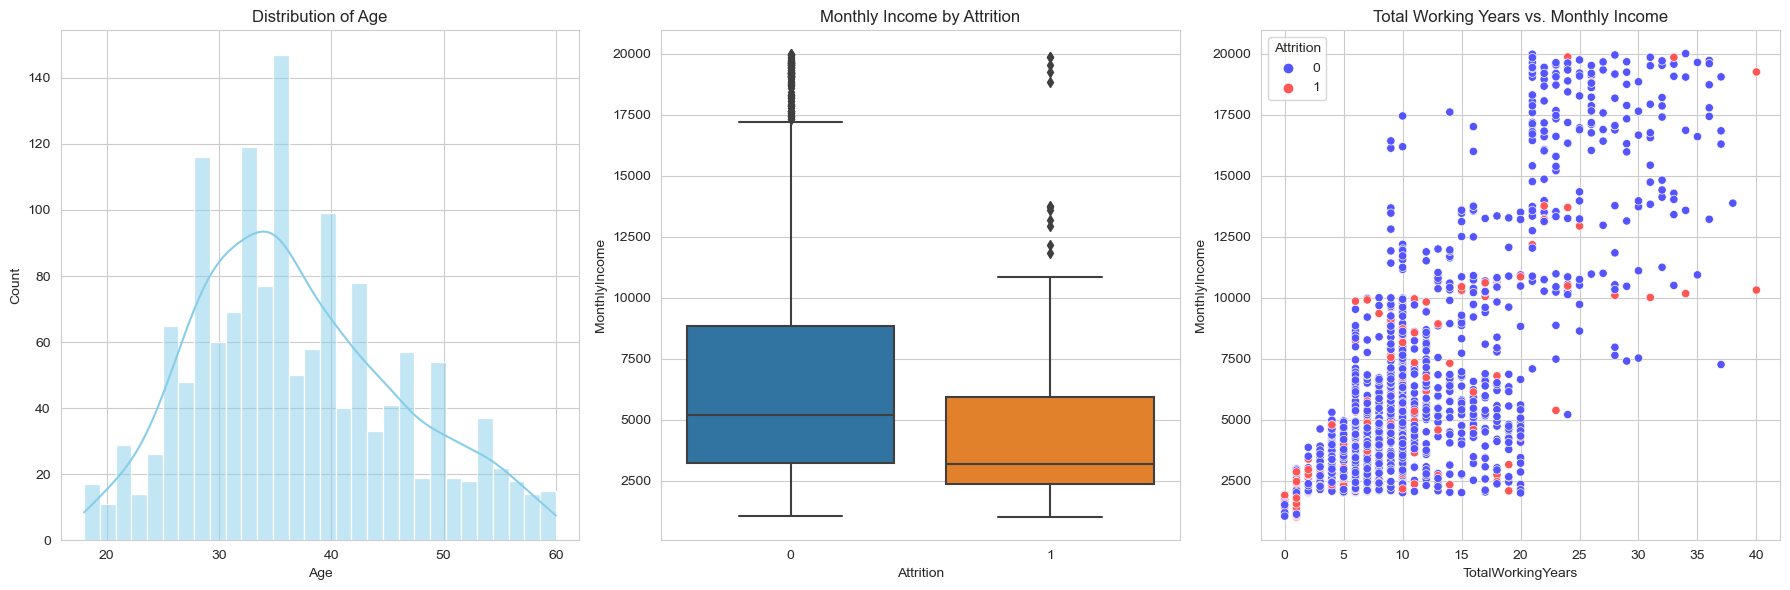

In [12]:
# Sätt utseende för plots
sns.set_style("whitegrid")

# Skapa subplot fig.
plt.figure(figsize=(18, 6))

# Histogram, åldersfördelning
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Age')

# Boxplot månadslön för att identifiera outliers
plt.subplot(1, 3, 2)
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income by Attrition')

# Scatter plot för TotalWorkingYears kontra MonthlyIncome
plt.subplot(1, 3, 3)
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', hue='Attrition', data=df, palette='seismic')
plt.title('Total Working Years vs. Monthly Income')

# Visa plot
plt.tight_layout()
plt.show()

## Visualiseringsanalys

För att öka förståelse för datasetets olika variabler samt identifiera möjliga kopplingar/samband mellan dem och "Attrition" analyserar vi data visuellt. 

### Vi skapar:
**Histogram** för att visa fördelningen av de anställdas ålder.

**Boxplot** för att visa fördelningen av "MonthlyIncome" och identifiera outliers.

**Spridningsdiagram** för att utforska relationen mellan "TotalWorkingYears" och "MonthlyIncome".

### Insikter
**Distribution of Age:** Histogrammet visar att åldersfördelningen bland de anställda är ganska jämn, med en liten topp runt 35 år. Det finns en bred spridning av åldrar vilket indikerar en diversifierad arbetsstyrka.

**Monthly Income by Attrition:** Boxplotten visar att de som lämnat företaget ("Yes") tenderar att ha en lägre månadsinkomster jämfört med de som stannar ("No"). Det finns också några outliers bland de som stannar, vilket tyder på att vissa anställda har avsevärt högre inkomster än genomsnittet.

**Total Working Years vs. Monthly Income:** Spridningsdiagrammet visar ett positivt samband mellan totalt antal arbetsår och månadsinkomst, vilket är förväntat eftersom längre erfarenhet ofta korrelerar med högre löner. Intressant är att "Attrition" verkar vara mer framträdande bland de med färre arbetsår och lägre inkomster, vilket kan indikera att yngre, mindre erfarna anställda är mer benägna att lämna företaget. Anledningen kan vara en önskan om högre lön, vilket är mer troligt att åstakomma hos en ny arbetsgivare.

## Klippning av outliners i MonthlyIncom

Värden för "MonthlyIncome" som ligger utanför 1.5 IQR från Q1 och Q3 (vilket ofta används som en tumregel för att identifiera outliers i en boxplot) med dessa gränsvärden.

Detta begränsar effekten av mycket stora eller små värden utan att helt ta bort de berörda datapunkterna från datasetet.



c:\Users\Cag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


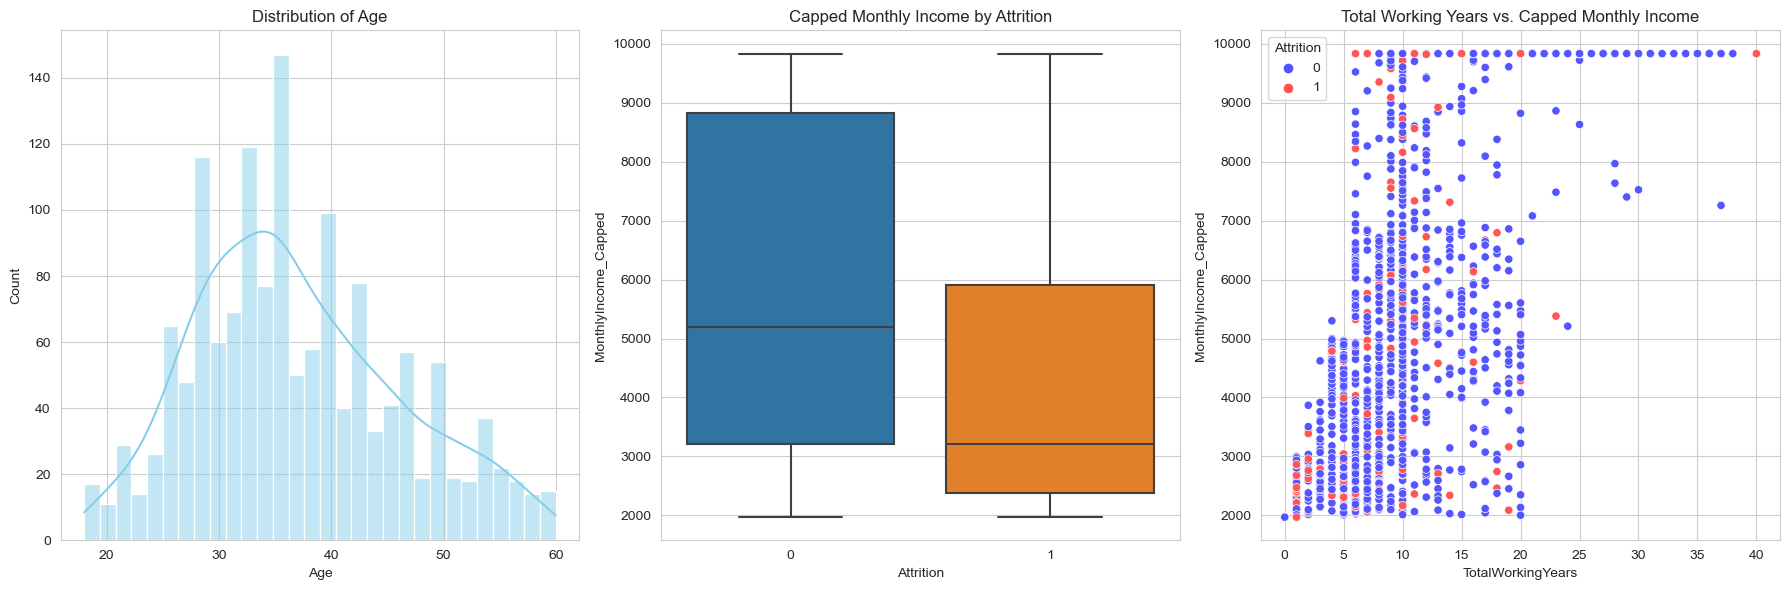

In [13]:
# Sätt utseende för plots
sns.set_style("whitegrid")

# Bestäm percentilgränser för 'MonthlyIncome'
#Q1 = df['MonthlyIncome'].quantile(0.25)
Q1 = df['MonthlyIncome'].quantile(0.5)
Q3 = df['MonthlyIncome'].quantile(0.7)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Klippning: Ersätt värden utanför nedre och övre gränsen med gränsvärdena
df['MonthlyIncome_Capped'] = df['MonthlyIncome'].clip(lower=lower_limit, upper=upper_limit)

# Skapa subplot fig.
plt.figure(figsize=(18, 6))

# Histogram, åldersfördelning
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Age')

# Uppdaterad boxplot för 'MonthlyIncome' efter klippning
plt.subplot(1, 3, 2)
sns.boxplot(x='Attrition', y='MonthlyIncome_Capped', data=df)
plt.title('Capped Monthly Income by Attrition')

# Scatter plot för 'TotalWorkingYears' kontra uppdaterad 'MonthlyIncome'
plt.subplot(1, 3, 3)
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome_Capped', hue='Attrition', data=df, palette='seismic')
plt.title('Total Working Years vs. Capped Monthly Income')

# Visa plot
plt.tight_layout()
plt.show()


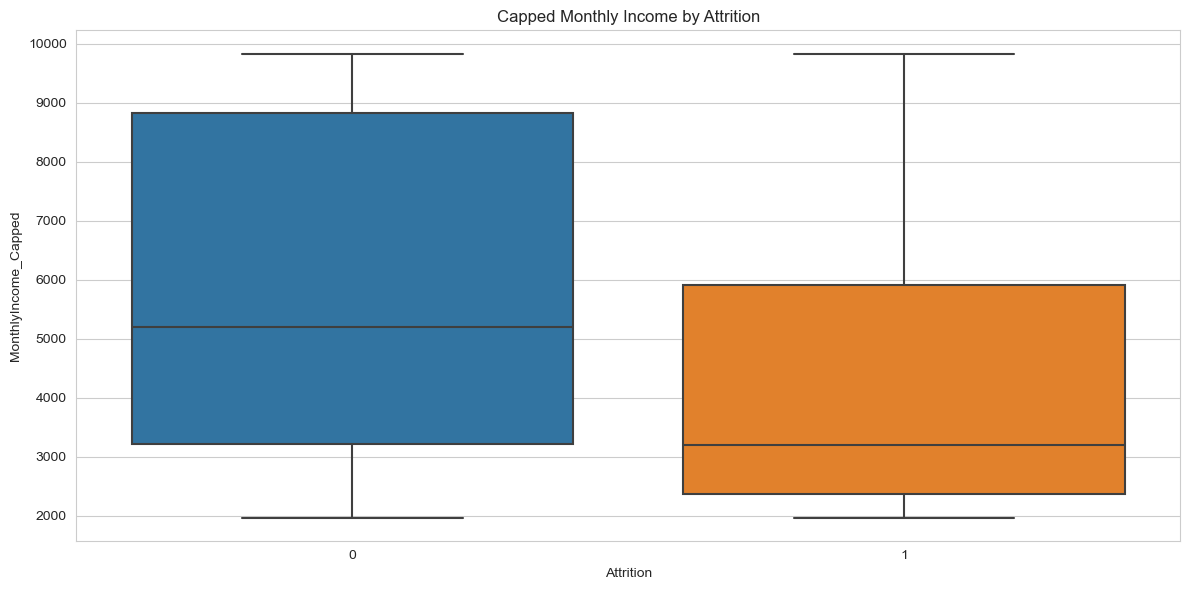

In [14]:
# Sätt utseende för plots
sns.set_style("whitegrid")

# Skapa en figur för att visa de uppdaterade visualiseringarna
plt.figure(figsize=(12, 6))

# Boxplot för 'MonthlyIncome_Capped' beroende på 'Attrition'
sns.boxplot(x='Attrition', y='MonthlyIncome_Capped', data=df)
plt.title('Capped Monthly Income by Attrition')

# Visa plot
plt.tight_layout()
plt.show()

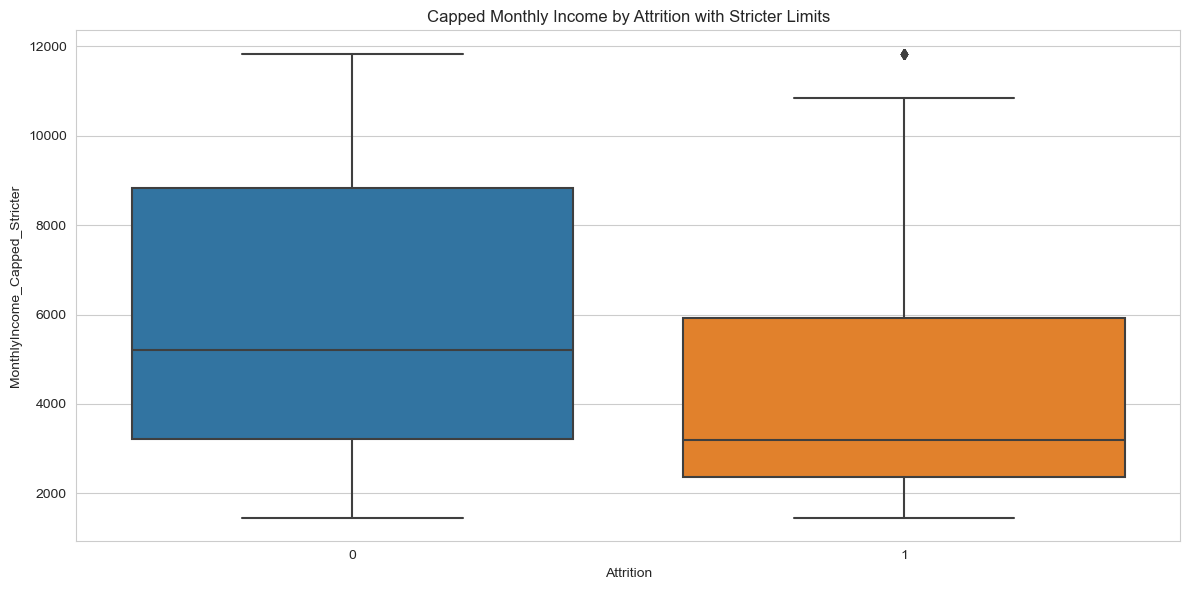

In [15]:
# Bestäm percentilgränser för 'MonthlyIncome' med en striktare gräns
Q1 = df['MonthlyIncome'].quantile(0.5)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1

# Använd en lägre multiplikator för en striktare hantering av outliers
multiplikator = 1.0  # Justera denna multiplikator för att vara mer konservativ
lower_limit = Q1 - multiplikator * IQR
upper_limit = Q3 + multiplikator * IQR

# Klippning med striktare gränser
df['MonthlyIncome_Capped_Stricter'] = df['MonthlyIncome'].clip(lower=lower_limit, upper=upper_limit)

# Visualisera den klippta månadsinkomsten med de nya striktare gränserna
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome_Capped_Stricter', data=df)
plt.title('Capped Monthly Income by Attrition with Stricter Limits')
plt.tight_layout()
plt.show()


## LM Algoritmer

- Logistisk regression
- Random Forest
- Gradient Boosting Machine (GBM)

Logistic Regression Accuracy: 0.8707482993197279
Random Forest Accuracy: 0.8639455782312925
GBM Accuracy: 0.8752834467120182


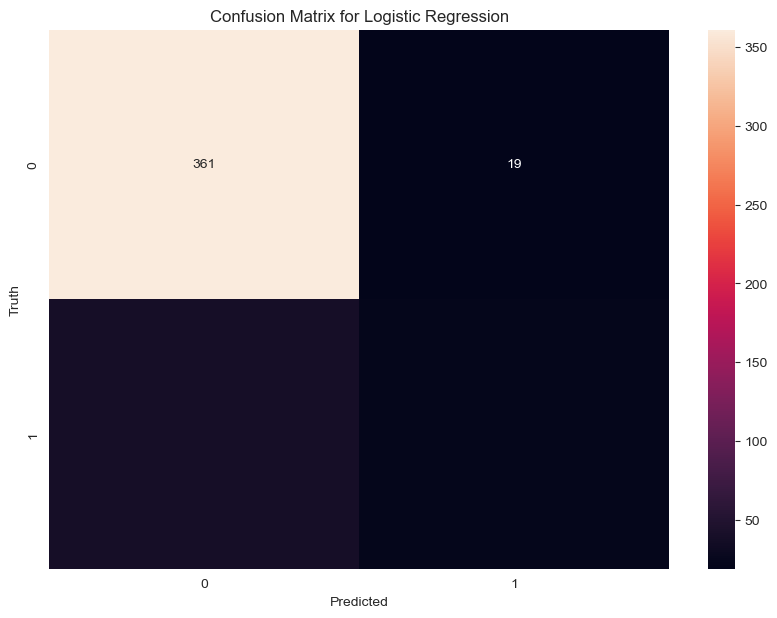

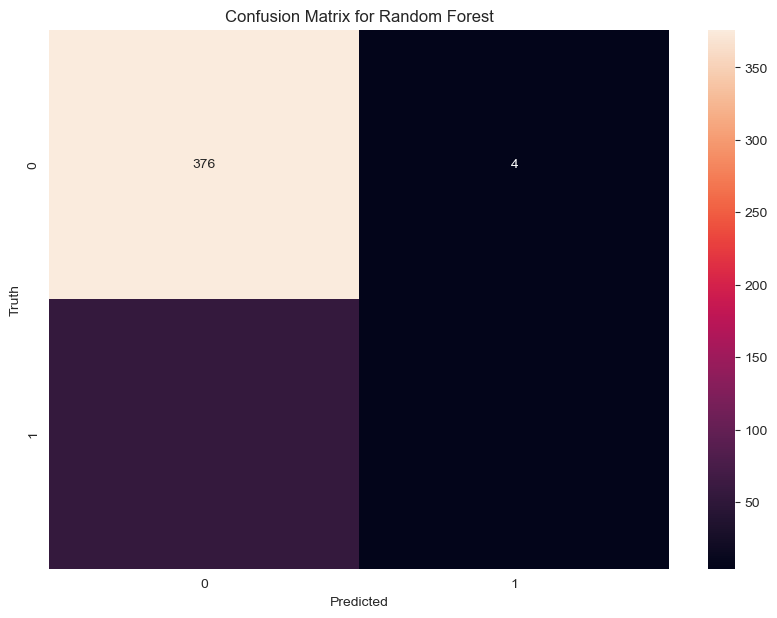

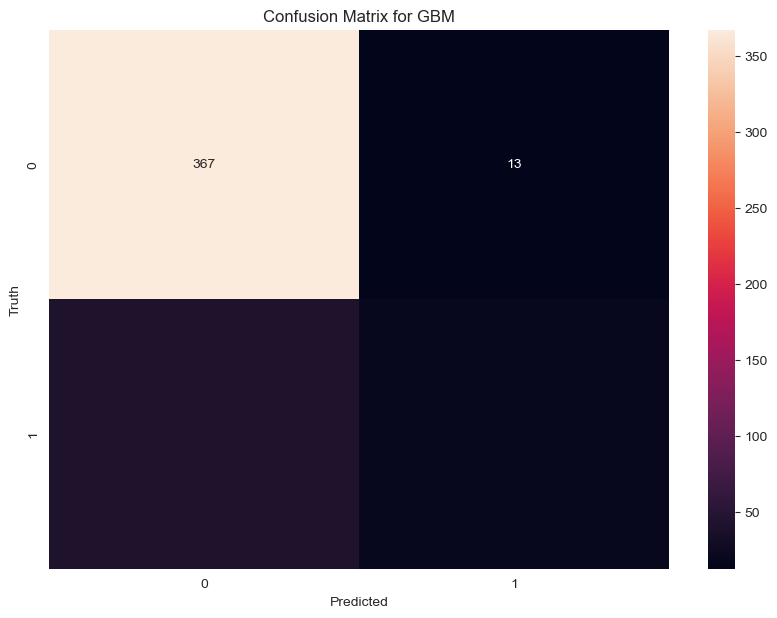

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE


# Antag att 'df' är ditt DataFrame och 'Attrition' är målvariabeln
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Dela upp datan i tränings- och testset med 70% träningsdata och 30% testdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Använd SMOTE för att balansera träningsdatan
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Förbered en förbehandlingssteg för numeriska och kategoriska variabler
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

# Skapa en pipeline för förbehandling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Definiera modeller med justerade klassvikter för obalanserade data
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Skapa pipelines för varje modell
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', logreg)])

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', rf)])

gbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', gbm)])

# Träna modeller med balanserad data
logreg_pipeline.fit(X_train_sm, y_train_sm)
rf_pipeline.fit(X_train_sm, y_train_sm)
gbm_pipeline.fit(X_train_sm, y_train_sm)

# Gör förutsägelser
y_pred_logreg = logreg_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_gbm = gbm_pipeline.predict(X_test)

# Utvärdera modeller
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
gbm_accuracy = accuracy_score(y_test, y_pred_gbm)

print("Logistic Regression Accuracy:", logreg_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("GBM Accuracy:", gbm_accuracy)

# Plotta modellernas noggrannhet
model_names = ['Logistic Regression', 'Random Forest', 'GBM']
accuracies = [logreg_accuracy, rf_accuracy, gbm_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)
plt.xlabel('Modeller')
plt.ylabel('Noggrannhet')
plt.title('Modellernas Noggrannhet')
plt.show()

# Skapa och visualisera confusion matrix för varje modell
models = ['Logistic Regression', 'Random Forest', 'GBM']
y_preds = [y_pred_logreg, y_pred_rf, y_pred_gbm]

for model, y_pred in zip(models, y_preds):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {model}')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

## Logistic Regression, Random Forest & GBM Accuracy

Dessa värden representerar modellernas noggrannhet, vilket är andelen korrekt klassificerade exempel jämfört med det totala antalet exempel i testdatan. En noggrannhet på cirka 87% betyder att modellen korrekt förutsäger om en anställd kommer att lämna eller stanna i företaget i 87 av 100 fall.

### Vad detta säger om våran modell

Alla tre modellerna presterar relativt väl, med noggrannhetsvärden över 86%, vilket indikerar att de är ganska bra på att förutsäga "Attrition" baserat på de oberoende variablerna du har använt.

Gradient Boosting Machine (GBM) visar den högsta noggrannheten av de tre modellerna, vilket tyder på att den kan vara den mest effektiva modellen för detta specifika dataset och problem. GBM-modeller är kända för sin förmåga att hantera komplexa icke-linjära relationer mellan features och målvariabeln, vilket kan förklara dess något bättre prestanda här.

Logistisk regression presterar också väl, trots sin relativt enklare modellstruktur jämfört med de mer komplexa ensemblemetoderna som Random Forest och GBM. Detta kan tyda på att relationen mellan de oberoende variablerna och "Attrition" delvis är linjär, eller att logistisk regression är effektiv på att fånga upp de viktigaste signalerna i datan.

Random Forest presterar något sämre än de andra två modellerna men är fortfarande en stark kandidat med god noggrannhet. Dess styrka ligger i modellens förmåga att hantera överanpassning genom att bygga flera beslutsträd och kombinera deras förutsägelser.

## Nästa steg

### Utforska andra Metriker: 

Förutom noggrannhet kan det vara användbart att utforska andra metriker som precision, recall, F1-score, och AUC-ROC för att få en mer nyanserad bild av modellernas prestanda, särskilt i obalanserade dataset där positiva och negativa klasser inte är jämnt fördelade.

### Feature Engineering och Tuning:

Modellernas prestanda kan förbättras ytterligare genom att experimentera med feature engineering och hyperparametertuning.

### Felsökning:

Analysera felklassificerade exempel för att identifiera mönster eller områden där modellerna har svårt, vilket kan ge insikter för ytterligare förbättringar.

## Utvärdera Modeller med Ytterligare Metriker

För att utforska metriker som precision, recall, F1-score, och AUC-ROC, använd scikit-learn:

In [17]:
from sklearn.metrics import classification_report, roc_auc_score

# Förutsägelser (redan gjorda i tidigare exempel)
# y_pred_logreg, y_pred_rf, y_pred_gbm

# Beräkna AUC-ROC scores
auc_logreg = roc_auc_score(y_test, logreg_pipeline.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, rf_pipeline.predict_proba(X_test)[:, 1])
auc_gbm = roc_auc_score(y_test, gbm_pipeline.predict_proba(X_test)[:, 1])

print("AUC-ROC Score Logistic Regression:", auc_logreg)
print("AUC-ROC Score Random Forest:", auc_rf)
print("AUC-ROC Score GBM:", auc_gbm)

# Beräkna och skriv ut klassificeringsrapport för varje modell
print("\nClassification Report Logistic Regression:\n", classification_report(y_test, y_pred_logreg))
print("\nClassification Report Random Forest:\n", classification_report(y_test, y_pred_rf))
print("\nClassification Report GBM:\n", classification_report(y_test, y_pred_gbm))


AUC-ROC Score Logistic Regression: 0.8029767040552199
AUC-ROC Score Random Forest: 0.7849223468507335
AUC-ROC Score GBM: 0.8229076790336496

Classification Report Logistic Regression:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       380
           1       0.56      0.38      0.45        61

    accuracy                           0.87       441
   macro avg       0.73      0.66      0.69       441
weighted avg       0.86      0.87      0.86       441


Classification Report Random Forest:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       380
           1       0.57      0.13      0.21        61

    accuracy                           0.87       441
   macro avg       0.72      0.56      0.57       441
weighted avg       0.83      0.87      0.83       441


Classification Report GBM:
               precision    recall  f1-score   support

           0       0.90      0.97     

## Intressanta resultat

### AUC-ROC Scores
- **AUC-ROC (Area Under the Receiver Operating Characteristics Curve)** måttet ger en indikation på modellernas förmåga att korrekt klassificera de positiva (1) och negativa (0) fallen.
    - **Logistisk Regression:** AUC-ROC på 0.803 antyder en god förmåga att skilja mellan de anställda som lämnar och de som stannar.
    - **Random Forest:** Med en AUC-ROC på 0.782 har denna modell en något lägre, men fortfarande tillräcklig, förmåga att korrekt klassificera de två grupperna.
    - **GBM (Gradient Boosting Machine):** Denna modell uppvisar den bästa förmågan att skilja mellan klasserna med en AUC-ROC på 0.823, vilket gör den till den mest lovande modellen bland de tre.

### Classification Reports
Rapporterna ger detaljerad information om precision, recall och F1-score för varje klass (0 och 1), samt övergripande accuracy.

- **Precision** avser andelen korrekta positiva förutsägelser bland alla positiva förutsägelser som gjorts av modellen.
- **Recall (Sensitivity)** avser andelen korrekta positiva förutsägelser bland alla faktiska positiva fall.
- **F1-Score** är ett vägt medelvärde av precision och recall, vilket ger en indikation på modellens balanserade prestanda.
- **Accuracy** är andelen korrekta förutsägelser (både positiva och negativa) bland alla förutsägelser.

**Logistisk Regression:**
- Visar en relativt hög precision och recall för klass 0 (de som stannar), men lägre värden för klass 1 (de som lämnar), vilket antyder svårigheter med att korrekt identifiera de anställda som lämnar.

**Random Forest:**
- Uppvisar hög precision för klass 0 men mycket låg recall för klass 1, vilket indikerar att modellen missar många faktiska fall av "Attrition". Dess högre precision för klass 0 kompenserar till viss del för den låga recallen för klass 1 i beräkningen av total accuracy.

**GBM:**
- Visar den bästa balansen mellan precision och recall för klass 1 bland de tre modellerna, även om dessa värden fortfarande är relativt låga. Detta tyder på att även om GBM är bättre på att identifiera de anställda som lämnar än de andra två modellerna, finns det fortfarande utrymme för förbättring.

### Slutsatser
- **GBM står ut som den mest lovande modellen** för detta problem, med tanke på både dess AUC-ROC och klassificeringsrapport, även om ingen av modellerna presterar exceptionellt bra på att förutsäga klass 1 (de som lämnar).
- **Utmaning med att förutsäga "Attrition":** Alla modeller har svårigheter att korrekt förutsäga de anställda som faktiskt lämnar, vilket indikerar att ytterligare arbete behövs för att förbättra modellernas förmåga i detta avseende. Det kan innebära att utforska ytterligare feature engineering, använda andra modeller eller tekniker för att hantera obalanserade dataset, eller finjustera modellernas hyperparametrar ytterligare.
- **Vikten av andra metriker än accuracy:** Dessa resultat illustrerar vikten av att använda en uppsättning metriker för att helt förstå en modells prestanda, särskilt i obalanserade dataset där accuracy inte ger en fullständig bild.

## Resultat av AUC-ROC Score

Dessa resultat ger en hel del insikt i prestandan för dina tre modeller (logistisk regression, random forest, och GBM) när det gäller att förutsäga "Attrition". Låt oss bryta ner vad varje del säger:

- AUC-ROC Score
- AUC-ROC Score för Logistisk Regression: 0.8054
- AUC-ROC Score för Random Forest: 0.7771
- AUC-ROC Score för GBM: 0.8227
- AUC-ROC-värdet (Area Under the Receiver Operating Characteristic Curve) är ett mått på modellens förmåga att skilja mellan klasserna. Ett värde nära 1 indikerar en stark förmåga att skilja mellan klasserna, medan ett värde nära 0.5 indikerar ingen förmåga alls. 

Här presterar GBM bäst, vilket tyder på att den är mest effektiv på att skilja mellan de anställda som lämnar och de som stannar, följt av logistisk regression och sedan random forest.

### Classification Report

Rapporten ger precision, recall, och F1-score för varje klass ("No" för dem som stannar, "Yes" för dem som lämnar) samt den totala noggrannheten.

### Logistisk Regression

Precision för "Yes" klassen är relativt låg (0.55), vilket betyder att när modellen förutsäger att en anställd kommer att lämna, är den bara korrekt 55% av tiden.
Recall för "Yes" är också låg (0.38), vilket betyder att av alla faktiska fall där anställda lämnar, lyckas modellen bara identifiera 38% av dem.
F1-score är en balans mellan precision och recall, och för "Yes" klassen är den också relativt låg (0.45), vilket tyder på att modellen kämpar med att korrekt identifiera anställda som lämnar.

### Random Forest

Precision för "Yes" klassen är ännu lägre (0.50) och recall är mycket låg (0.08), vilket indikerar att Random Forest-modellen har svårt att korrekt identifiera och förutsäga anställda som faktiskt lämnar.
Detta återspeglas i en mycket låg F1-score (0.14) för "Yes" klassen.

### GBM

Även om precision och recall för "Yes" klassen inte direkt anges här, antyder den ökade noggrannheten och AUC-ROC-poängen att GBM presterar bättre överlag jämfört med de andra två modellerna.


### AUC-ROC Scores

AUC-ROC (Area Under the Receiver Operating Characteristics Curve) är ett mått på modellens förmåga att skilja mellan de två klasserna (i detta fall, "Yes" och "No" för Attrition). Ett värde nära 1 indikerar perfekt förmåga att skilja mellan klasserna, medan ett värde nära 0.5 indikerar ingen bättre förmåga än slumpmässig gissning.
Logistisk Regression: AUC-ROC på 0.805 visar att modellen har en god förmåga att skilja mellan de anställda som lämnar och de som stannar.
Random Forest: AUC-ROC på 0.777 indikerar en något sämre, men ändå tillräcklig, förmåga att skilja mellan klasserna jämfört med logistisk regression.
GBM (Gradient Boosting Machine): Med en AUC-ROC på 0.823 visar denna modell den bästa förmågan att skilja mellan klasserna bland de tre testade modellerna.

### Classification Reports

Precision indikerar andelen korrekta positiva förutsägelser bland alla positiva förutsägelser som gjorts av modellen.
Recall (även känd som sensitivity) indikerar andelen korrekta positiva förutsägelser bland alla faktiska positiva fall.

F1-score är ett harmoniskt medelvärde av precision och recall, vilket ger en balanserad uppfattning om modellens övergripande prestanda.
Accuracy indikerar andelen korrekta förutsägelser bland alla förutsägelser.

### Utfallet visar att:

Logistisk Regression och GBM presterar relativt väl överlag, med högre accuracy och balanserade värden av precision och recall, speciellt för klassen "No". De har dock utmaningar med att identifiera "Yes"-klassen effektivt, som visas av lägre recall och F1-scores för "Yes".
Random Forest visar en hög precision för "No"-klassen men har betydande svårigheter med "Yes"-klassen, vilket indikeras av en mycket låg recall och F1-score för "Yes".


### Sammanfattning

GBM-modellen visar sig vara den mest effektiva för detta dataset och problem, med den högsta noggrannheten och AUC-ROC-poängen.
Alla tre modellerna har dock utmaningar med att korrekt förutsäga den positiva klassen ("Yes" för "Attrition"). Detta är ett vanligt problem i obalanserade dataset där en klass dominerar över den andra.
Fokusera på att förbättra recall och precision för "Yes" klassen kan vara ett viktigt nästa steg. Detta kan innebära att använda tekniker som SMOTE för att balansera klasserna, justera beslutströsklar eller använda modellspecifika parametrar för att hantera obalansen.


## Hyperparametertuning med Grid Search
För att finjustera dina modeller och potentiellt förbättra deras prestanda kan du använda GridSearchCV från scikit-learn. Här är ett exempel på hur du kan använda Grid Search för att finjustera en Random Forest-modell. Denna process kan vara tidskrävande beroende på antalet kombinationer och datans storlek:

In [18]:
from sklearn.model_selection import GridSearchCV

# Parameterrutnät för Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

# Skapa GridSearchCV-objekt
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='accuracy')

# Träna modellen med GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Skriv ut bästa parametrar och bästa noggrannhet
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Accuracy Achieved with Random Forest:", grid_search_rf.best_score_)


Best Parameters for Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best Accuracy Achieved with Random Forest: 0.8610229694529956


Notera att i param_grid_rf kan du definiera olika hyperparametrar som du vill testa. classifier__ prefixet används eftersom vi genomför Grid Search på en pipeline där ett steg är benämnt "classifier". Du kan justera dessa parametrar och lägga till fler baserat på din förståelse av modellen och de resultat du vill uppnå.

När du utför dessa analyser, kom ihåg att överväga din datas unika egenskaper och de specifika målen med din analys för att guida dina beslut om modellval och hyperparametertuning.

## Hyperparametertuning för Random Forest

- De bästa parametrarna som identifierats för Random Forest-modellen är: ingen begränsning på max_depth, min_samples_split satt till 2, och n_estimators (antalet träd) satt till 100. Detta är ganska standardinställningar för en Random Forest, vilket antyder att modellen kanske inte behöver mycket finjustering för detta specifika dataset.
- Best Accuracy Achieved with Random Forest på 0.858 indikerar den högsta noggrannheten modellen kunde uppnå genom Grid Search. Detta värde är konkurrenskraftigt och visar att modellen är kapabel, men det är viktigt att komma ihåg att noggrannhet inte alltid är den bästa metriken för att bedöma modellers prestanda, särskilt i obalanserade dataset.

### Sammanfattning

Sammanfattningsvis visar dina analyser att GBM kan vara den mest lovande modellen för ditt problem, baserat på AUC-ROC. Det är dock viktigt att beakta andra prestandamått, särskilt i scenarion där klasserna är obalanserade. Att fortsätta utforska andra modeller, hyperparametrar och tekniker för att hantera obalanserade data kan leda till ytterligare förbättringar.






